In [105]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
%matplotlib inline 

In [106]:
startup_data = pd.read_csv(r'C:\Users\AKASH\Desktop\50_Startups.csv')

In [107]:
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


C:\Users\AKASH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


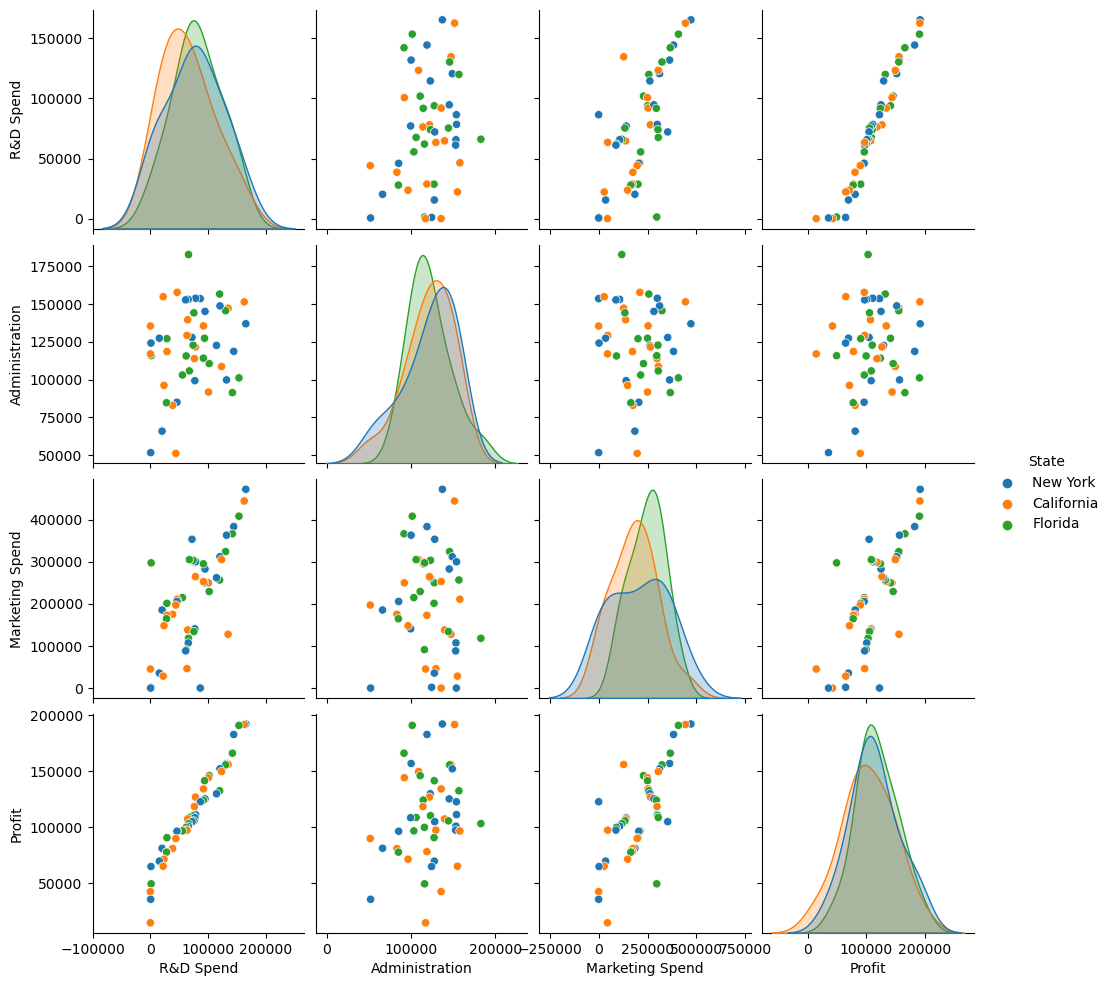

In [47]:
sns.pairplot(startup_data,hue="State")

C:\Users\AKASH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


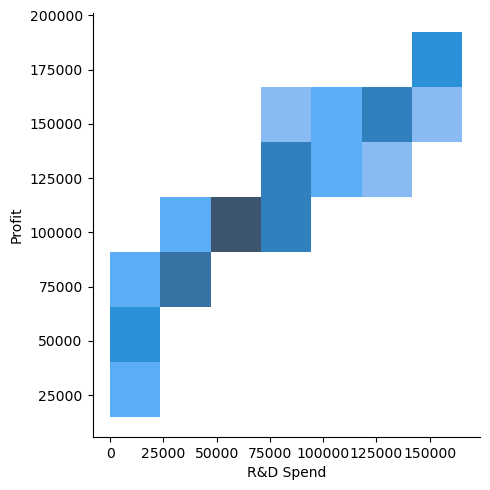

In [108]:
sns.displot(data=startup_data,x=startup_data["R&D Spend"],y=startup_data["Profit"])

In [109]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [112]:
startup_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [113]:
df = startup_data.drop("State",axis=1)

In [114]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


<Axes: >

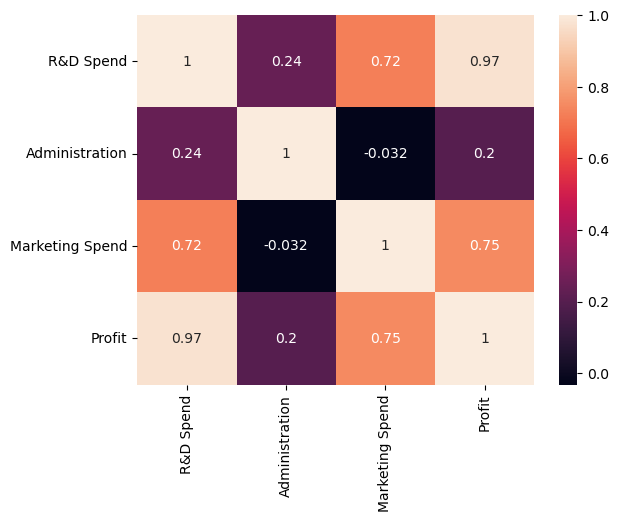

In [115]:
sns.heatmap(df.corr(),annot = True)
# from here we can see that R&D spent and marketing spent are more corrilated with the profits 

In [116]:
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [117]:
state = pd.get_dummies(startup_data["State"])

In [118]:
startup_data = startup_data.drop("State",axis=1)

In [119]:
data = pd.concat([startup_data,state],axis=1)

In [120]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,False,False,True
1,162597.70,151377.59,443898.53,191792.06,True,False,False
2,153441.51,101145.55,407934.54,191050.39,False,True,False
3,144372.41,118671.85,383199.62,182901.99,False,False,True
4,142107.34,91391.77,366168.42,166187.94,False,True,False


In [64]:
X = data[["R&D Spend","Administration","Marketing Spend","California","Florida"]]
y = data["Profit"]

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=101)

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lm = LinearRegression()

In [71]:
lm.fit(X_train,y_train)


LinearRegression()

# Predictions 

In [72]:
predictions = lm.predict(X_test)

In [73]:
predictions 

array([ 85233.4447002 , 156496.00945931, 118768.3665043 ,  97947.27776905,
       119872.29810887, 190211.19581852, 116541.8453817 ,  60406.82750179,
        67912.82823516,  45115.20191597, 115841.13481142, 112374.23266799,
       166647.41597969,  46944.48018051, 133962.70768704, 174300.59834717,
        77853.60892088, 104042.59040166, 146650.76544728, 115251.82609559])

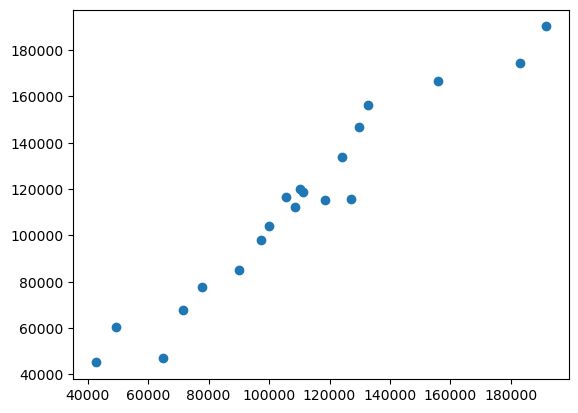

In [74]:
plt.scatter(y_test,predictions)
# it is comming kind of linear so it is a good prediction 

# Regression Error metrices

In [76]:
from sklearn import metrics

In [77]:
metrics.mean_absolute_error(y_test,predictions)

8090.678977847713

In [78]:
metrics.mean_squared_error(y_test,predictions)

102686697.13899048

In [81]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

10133.444485415139

In [83]:
predictions = lm.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.values.reshape(len(predictions),1)),1))


[[ 85233.44  89949.14]
 [156496.01 132602.65]
 [118768.37 111313.02]
 [ 97947.28  97427.84]
 [119872.3  110352.25]
 [190211.2  191792.06]
 [116541.85 105733.54]
 [ 60406.83  49490.75]
 [ 67912.83  71498.49]
 [ 45115.2   42559.73]
 [115841.13 126992.93]
 [112374.23 108552.04]
 [166647.42 155752.6 ]
 [ 46944.48  64926.08]
 [133962.71 124266.9 ]
 [174300.6  182901.99]
 [ 77853.61  77798.83]
 [104042.59  99937.59]
 [146650.77 129917.04]
 [115251.83 118474.03]]


In [121]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,False,False,True
1,162597.70,151377.59,443898.53,191792.06,True,False,False
2,153441.51,101145.55,407934.54,191050.39,False,True,False
3,144372.41,118671.85,383199.62,182901.99,False,False,True
4,142107.34,91391.77,366168.42,166187.94,False,True,False


# Trying new possibilities 


In [123]:
X = data[["R&D Spend","Administration","Marketing Spend","California","Florida","New York"]]
y = data["Profit"]

In [124]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=101)

In [125]:
lm = LinearRegression()

In [126]:
lm.fit(X_train,y_train)


LinearRegression()

In [127]:
predictions = lm.predict(X_test)

In [128]:
predictions

array([ 85233.44, 156496.01, 118768.37,  97947.28, 119872.3 , 190211.2 ,
       116541.85,  60406.83,  67912.83,  45115.2 , 115841.13, 112374.23,
       166647.42,  46944.48, 133962.71, 174300.6 ,  77853.61, 104042.59,
       146650.77, 115251.83])

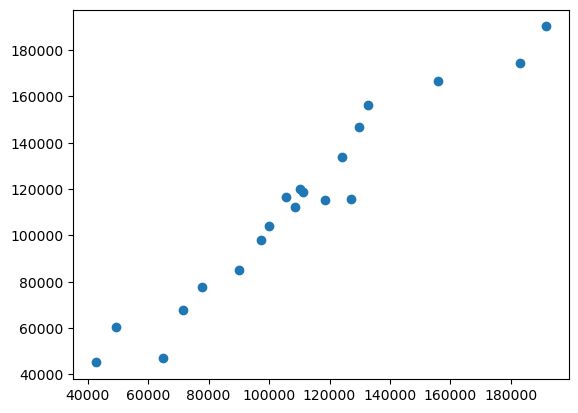

In [129]:
plt.scatter(y_test,predictions)

# Regression error metrices 

In [130]:
metrics.mean_absolute_error(y_test,predictions)

8090.678977851208

In [131]:
metrics.mean_squared_error(y_test,predictions)

102686697.13910636

In [132]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

10133.444485420856

In [133]:
predictions = lm.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.values.reshape(len(predictions),1)),1))


[[ 85233.44  89949.14]
 [156496.01 132602.65]
 [118768.37 111313.02]
 [ 97947.28  97427.84]
 [119872.3  110352.25]
 [190211.2  191792.06]
 [116541.85 105733.54]
 [ 60406.83  49490.75]
 [ 67912.83  71498.49]
 [ 45115.2   42559.73]
 [115841.13 126992.93]
 [112374.23 108552.04]
 [166647.42 155752.6 ]
 [ 46944.48  64926.08]
 [133962.71 124266.9 ]
 [174300.6  182901.99]
 [ 77853.61  77798.83]
 [104042.59  99937.59]
 [146650.77 129917.04]
 [115251.83 118474.03]]


So far there was no change in the value of the erroe metrices 